Python for Data Science: Load the ‘Student Performance’ dataset into one of the data
structures (NumPy or Pandas) and perform the following operations.
a. Display header rows and description of the loaded dataset.
b. Remove unnecessary features (E.g. drop unwanted columns) from the dataset such
as ‘lunch’ and ‘test preparation course.
c. Convert the attribute ‘race/ethnicity’ to have ‘groupA’ to be ‘Asian Students’,
‘groupB’ to be ‘African Students’ , ‘groupC’ to be ‘Afro-Asian Students’,
‘groupD’ to be ‘American Students’ and ‘groupE’ to be ‘European Students’.
d. Perform the following visualizations on the loaded dataset:
    • Tally of the Number of Male & Female students who took up the ‘test
    preparation course’ and those who did not.
    • Total Number of Male & Female Students belonging to each student group
    • No of students who ‘failed’(less than 40), ‘second class’(between 40 & 50),
    ‘first class’(between 60 & 75) and ‘distinction’(above 75) in ‘Maths’,
    ‘Reading’ and ‘Writing’.

In [32]:
#numpy - Deals multi-dimensional arrays and matrices
#seaborn - Deals with data visualization
#matplotlib - Plotting; pyplot-interactive plotting
#pandas - data structures and data analysis tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
#Import csv file into variable (dataframe)
studperf_df = pd.read_csv('StudentsPerformance.csv');
studperf_df.info();print("\n\n\n")
#showing info about the data frame
studperf_df.info(verbose=False)#short Summary
print("\n\n\n");studperf_df.describe()
studperf_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  774 non-null    object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   mathscore                    1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 8 entries, gender to writing score
dtypes: int64(3), object(5)
memory usage: 62.6+ KB






,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,NaN,standard,completed,88,95,92
7,male,group B,NaN,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [34]:
#dropping lunch column
studperf_df.drop(['lunch'],axis=1,inplace=True)
studperf_df.head(3)

,gender,race/ethnicity,parental level of education,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,NaN,completed,69,90,88
2,female,group B,master's degree,none,90,95,93


In [35]:
#replacing NaN values in "parental level of education" to "Not applicable"
studperf_df['parental level of education'] = studperf_df['parental level of education'].fillna("Not applicable")
studperf_df.head()

,gender,race/ethnicity,parental level of education,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,Not applicable,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,Not applicable,none,76,78,75


In [36]:
#mapping according to question
studperf_df['race/ethnicity']=studperf_df['race/ethnicity'].map({
    "group A":"Asian",
    "group B": 'African',
    "group C":"Afro-American",
    "group D":"American",
    "group E":"European"
})
studperf_df.head()

,gender,race/ethnicity,parental level of education,test preparation course,mathscore,reading score,writing score
0,female,African,bachelor's degree,none,72,72,74
1,female,Afro-American,Not applicable,completed,69,90,88
2,female,African,master's degree,none,90,95,93
3,male,Asian,associate's degree,none,47,57,44
4,male,Afro-American,Not applicable,none,76,78,75


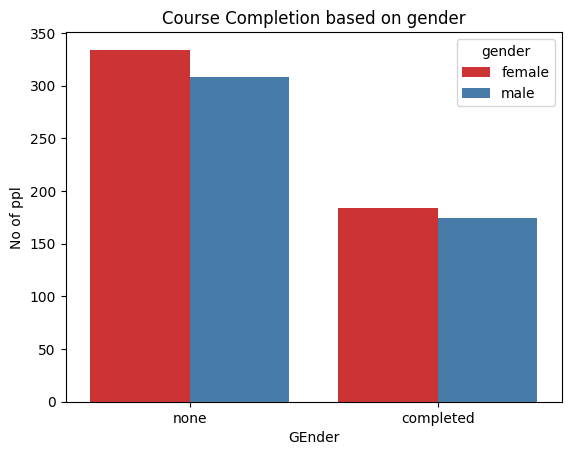

In [37]:
#Tally of the Number of Male & Female students who took up the ‘test preparation course’ and those who did not.
ax=sns.countplot(data=studperf_df,x="test preparation course",hue='gender',palette='Set1')
ax.set(title='Course Completion based on gender',xlabel='GEnder',ylabel='No of ppl')
plt.show()

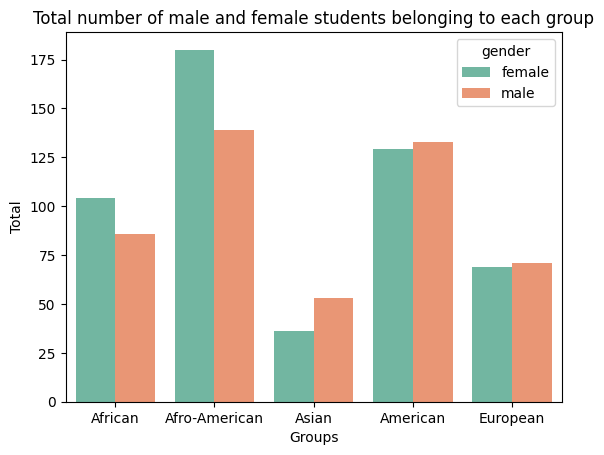

In [38]:
#Total Number of Male & Female Students belonging to each student group 
ax = sns.countplot(x="race/ethnicity",hue="gender",palette="Set2",data=studperf_df)
ax.set(title="Total number of male and female students belonging to each group", xlabel="Groups", ylabel="Total")
plt.show()

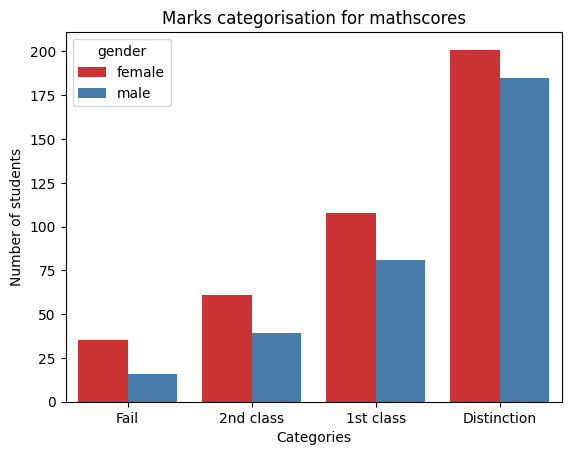

In [39]:
#making intervals of marks  from mathscore according to question
interval=(0,40,50,60,75)
categories = ["Fail", "2nd class","1st class","Distinction"]
studperf_df["Marks_cats"]=pd.cut(studperf_df.mathscore,interval,labels=categories)
ax=sns.countplot(x="Marks_cats",hue="gender",palette="Set1",data=studperf_df)
ax.set(title="Marks categorisation for mathscores",xlabel="Categories",ylabel="Number of students")
plt.show()

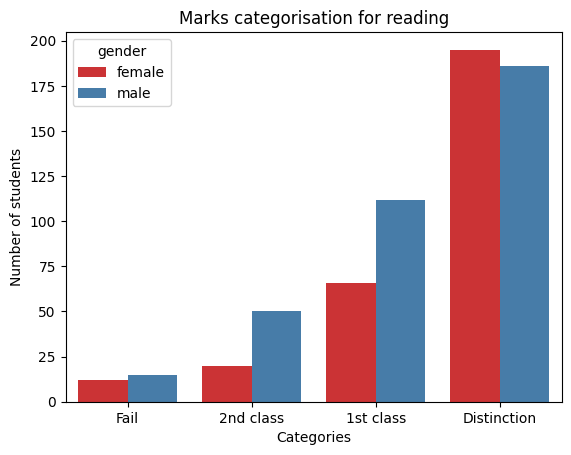

In [40]:
#Marks categorisation for reading
studperf_df["Marks_Cats"]=pd.cut(studperf_df["reading score"],interval,labels=categories)
ax=sns.countplot(x="Marks_Cats",hue="gender",palette="Set1",data=studperf_df)
ax.set(title="Marks categorisation for reading",xlabel="Categories",ylabel="Number of students")
plt.show()

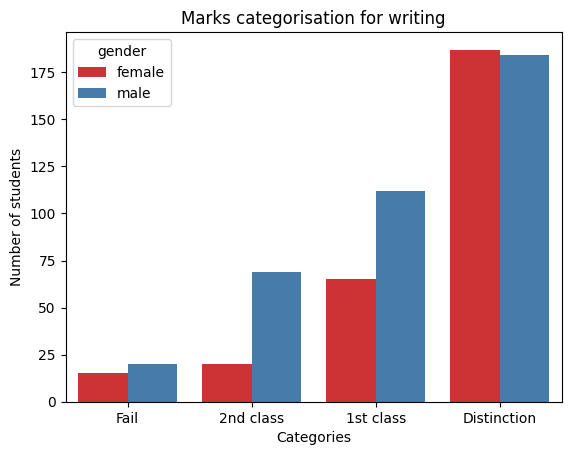

In [41]:
#Marks categorisation for writing
studperf_df["Marks_Cats"]=pd.cut(studperf_df["writing score"],interval,labels=categories)
ax=sns.countplot(x="Marks_Cats",hue="gender",palette="Set1",data=studperf_df)
ax.set(title="Marks categorisation for writing",xlabel="Categories",ylabel="Number of students")
plt.show()